[Installed Tensor Flow for Anaconda](https://www.tensorflow.org/install/install_windows)
[tutorial using Keras](https://www.tensorflow.org/tutorials/keras/)

After you activate tensor flow in conda prompt like so your prompt should change
C:\Users\NS-PC>activate tensorflow

run command like so to invoke jupyter notebook from tensor flow environment
(tensor flow) C:\Users\NS-PC>jupyter notebook

# Train your first neural network: basic classification

https://www.tensorflow.org/tutorials/keras/basic_classification

In [3]:
# had to do this because matplotlib was not avaiable in the tensorflow environment
!pip install matplotlib

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.0.0 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [5]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Label	Class  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot  

In [6]:
# Lets store the above class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
               'Bag', 'Ankle boot']

In [7]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [25]:
train_images[0,2:5,2:5]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_images)

10000

# Preprocess the data

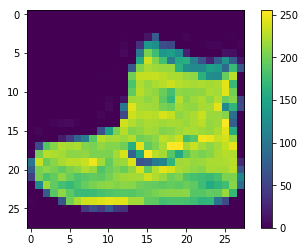

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
# not sure what this does
plt.gca().grid(False)

In [18]:
# We scale these values from 0-250 to a range of 0 to 1 before feeding to the neural network model.
train_images = train_images / 255.0
test_images = test_images / 255.0

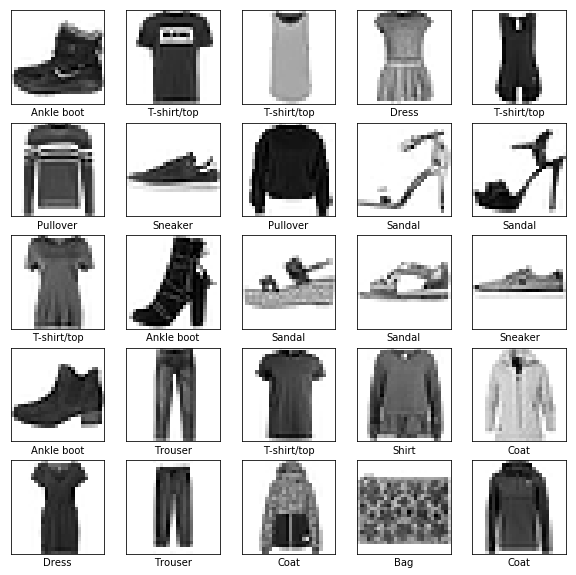

In [20]:
# Display the first 25 images from the training set and display the class name below each image. 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Build the model

In [21]:
# Setup the layers
# The basic building block of a neural network is the layer. Layers extract representations from the 
# data fed into them.
# Most of deep learning consists of chaining together simple layers. 
# Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

# Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.  
Optimizer —This is how the model is updated based on the data it sees and its loss function.  
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [26]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—the model is "fit" to the training data:

In [27]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.5040 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3756 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3362 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3129 - acc: 0.8865
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2948 - acc: 0.8918


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

# Evaluate accuracy

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/step
Test accuracy: 0.8772


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

# Make predictions

In [30]:
predictions = model.predict(test_images)

In [31]:
predictions[0]

array([4.5685861e-06, 5.0547644e-08, 8.3696278e-08, 5.7381758e-08,
       1.0762841e-06, 1.5562106e-02, 3.7375828e-06, 4.9111944e-02,
       6.6429027e-05, 9.3524992e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [33]:
test_labels[0]

9

# Plot Predictions

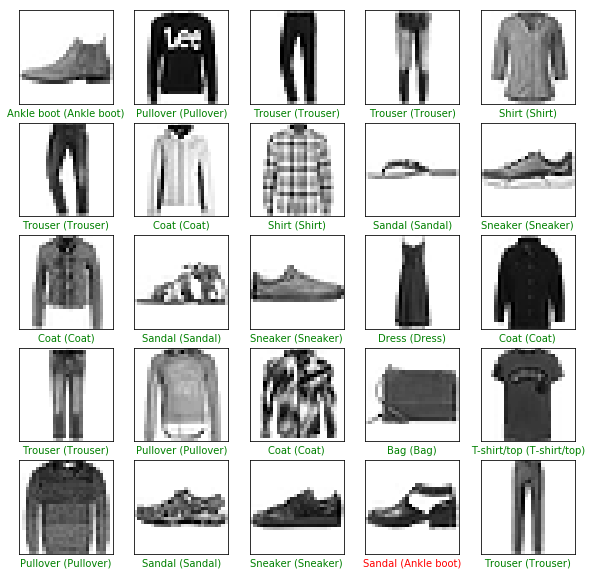

In [35]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

# Make predictions on a single image

[4.5685815e-06 5.0547548e-08 8.3696278e-08 5.7381538e-08 1.0762841e-06
 1.5562106e-02 3.7375828e-06 4.9111944e-02 6.6428904e-05 9.3524992e-01]
9
Ankle boot


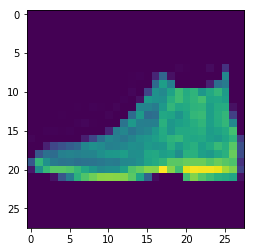

In [38]:
# Grab an image from the test dataset
img = test_images[0]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
predictions = model.predict(img)

print(predictions[0])
print(test_labels[0])
print(class_names[test_labels[0]])
plt.imshow(test_images[0])